# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator. # super confusing since problem 6 asks us to research other modules.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [26]:
# YOUR CODE HERE
df_bf = pd.read_csv('560_bodyfat.tsv', sep='\t')
df_bf.isnull().sum() #use this to check for NaN but found none
df_bf.sample(10)
# df_bf = df_bf.iloc[:, :10] to slice the columns but dont need it right now
# df_bf.shape

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
11,1.0812,27.0,216.00,76.00,39.400002,103.599998,90.900002,107.699997,66.199997,39.200001,25.900000,37.200001,30.200001,19.000000,7.800000
231,1.0620,57.0,182.25,71.75,39.400002,103.400002,96.699997,100.699997,59.299999,38.599998,22.799999,31.799999,29.100000,19.000000,16.100000
203,1.0854,44.0,184.00,74.00,37.900002,100.800003,89.099998,102.599998,60.599998,39.000000,24.000000,32.900002,29.200001,18.400000,6.000000
81,1.0382,64.0,150.25,67.25,38.099998,97.099998,89.000000,96.900002,54.799999,38.000000,22.000000,29.900000,25.200001,17.700001,26.799999
115,1.0607,40.0,158.00,69.25,36.299999,97.000000,86.599998,92.599998,55.900002,36.299999,22.100000,29.799999,26.299999,17.299999,16.700001
61,1.0317,56.0,178.75,68.50,35.599998,102.900002,94.699997,100.800003,60.900002,38.000000,22.100000,32.500000,29.799999,18.299999,29.799999
90,1.0520,46.0,177.00,70.00,37.200001,99.699997,95.599998,102.199997,58.299999,38.200001,22.500000,29.100000,27.700001,17.700001,20.500000
71,1.0788,55.0,146.75,68.75,38.700001,88.500000,82.800003,95.500000,58.900002,37.599998,21.600000,30.299999,27.299999,18.299999,8.800000
23,1.0584,32.0,148.75,70.00,35.500000,86.699997,80.000000,93.400002,54.900002,36.200001,22.100000,29.799999,26.700001,17.100000,17.700001
88,1.0800,46.0,176.75,72.50,38.000000,97.300003,86.000000,99.300003,61.000000,38.400002,23.799999,30.200001,29.299999,18.799999,8.300000


some of the code is for checking side quests in the problem but dont need them.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [25]:
# YOUR CODE HERE
df_bf.columns.tolist()

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'target']

Density: Body desnity which is mass per unit volume. used to estimate body fat percentage.
age: age of a person in years.
weight: weight of a person in pounds.
height: height of a person in inches.
neck: neck circumference in cm.
chest: chest circumference in cm.
Abdomen: abdomen circumference in cm.
Hip: hip circumference in cm.
thigh: thigh circumference in cm.
Knee: knee circumference in cm.
Ankle: ankle circumference in cm.
Biceps: biceps circumference in cm.
Forearm: forearm circumference in cm.
Wrist: wrist circumference in cm.
Target: percentage of body fat.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [41]:
df_bf.corr()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472967,-0.682599,-0.798955,-0.609332,-0.553091,-0.495041,-0.264890,-0.487109,-0.351648,-0.325716,-0.987782
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531,0.291458
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894190,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775,0.612414
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065,-0.089495
Neck,-0.472967,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826,0.490592
Chest,-0.682599,0.176450,0.894190,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162,0.702620
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832,0.813432
Hip,-0.609332,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090,0.625201
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685,0.559608
Knee,-0.495041,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507,0.508665


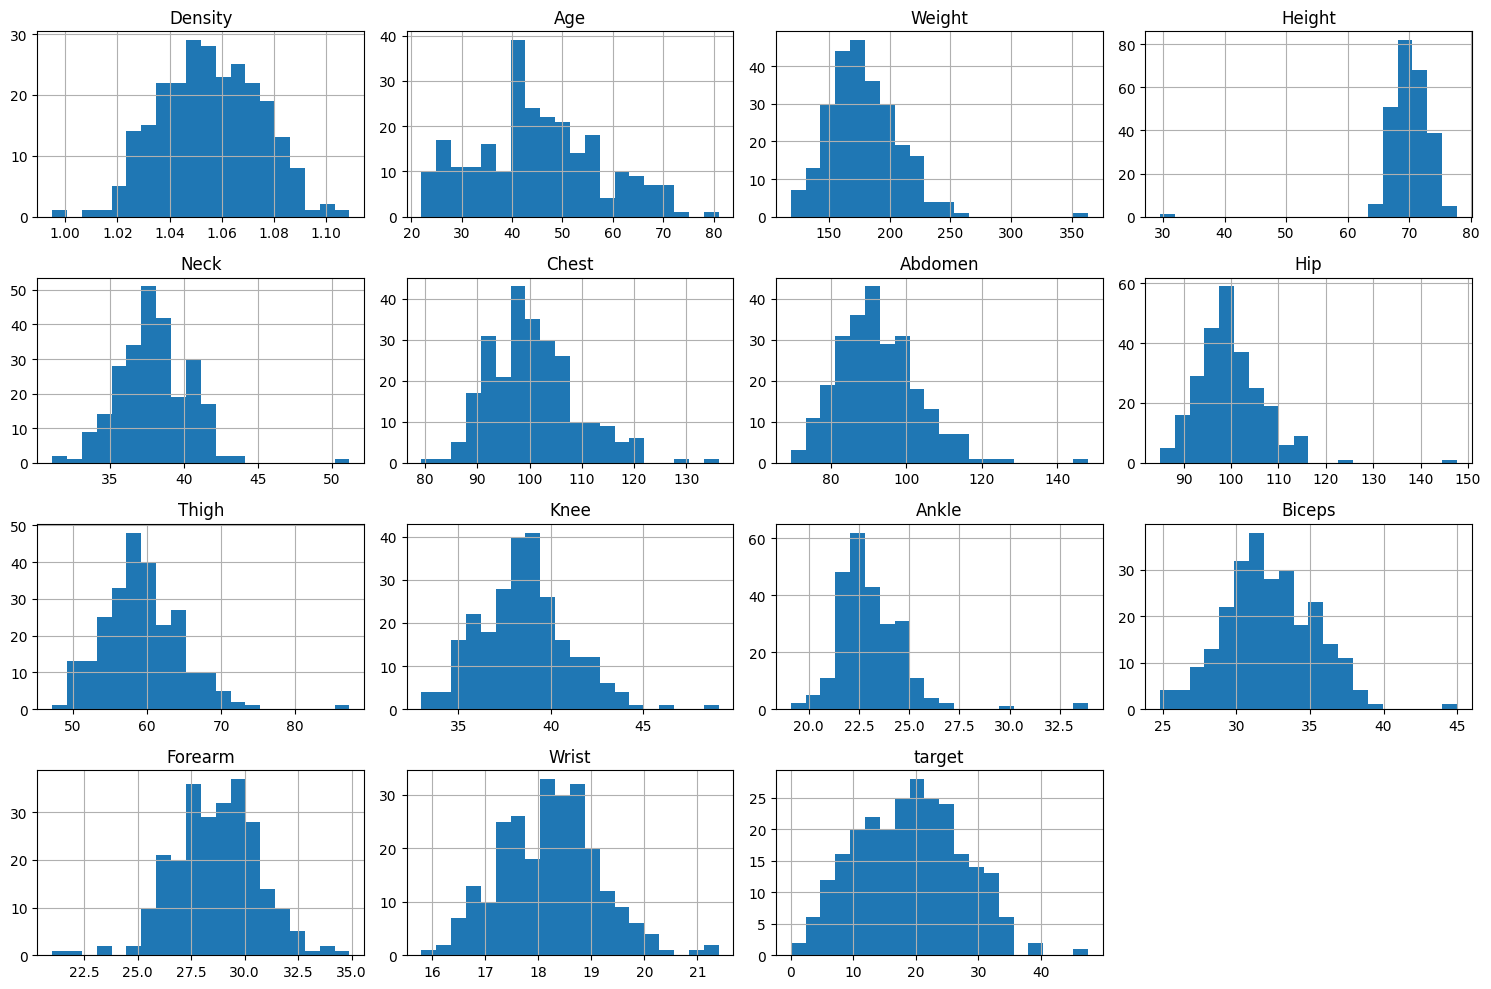

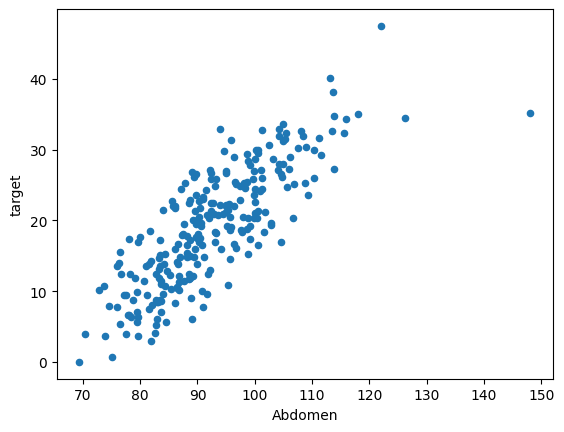

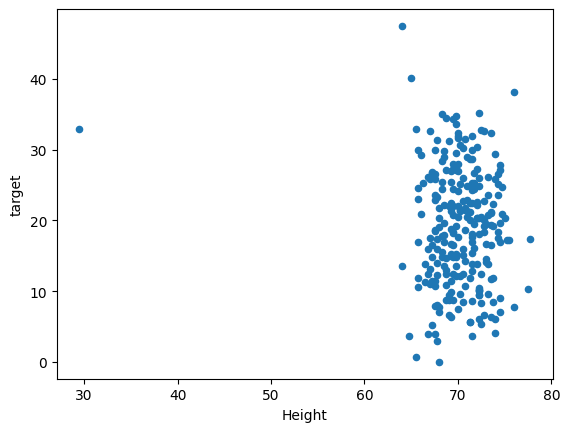

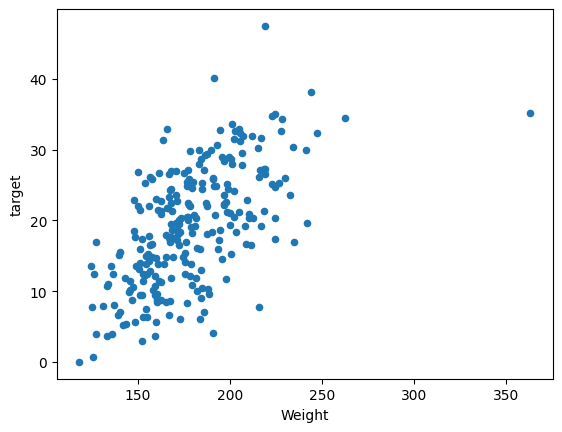

In [40]:
# YOUR CODE HERE
df_bf.describe()
df_bf.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

df_bf.corr()
df_bf.plot.scatter(x="Abdomen", y='target')
df_bf.plot.scatter(x="Height", y='target')
df_bf.plot.scatter(x='Weight', y='target')
plt.show()

1. abdomen vs target: This is a positive correlation, meaning as abdomen size increases, body fat percentage also increases. This is expected since abdomen size is a good indicator of body fat.You can see that there is a linear relationship between the two variables based on the scatter plot.
2. Height vs target: I chose this because of the almost zero correlation. -0.08 was the correlation value. This means that height has little to no effect on body fat percentage. This is expected since height is not a good indicator of body fat. Another interesting observation was row 41 which had a height of 29.5 inches which is an outlier and not possible for an adult.
3. Weight vs target: This is a positive correlation, meaning as weight increases, body fat percentage also increases. This is expected since weight is a good indicator of body fat. You can see that there is a linear relationship between the two variables based on the scatter plot. while this is expected the cloud of points is more spread out compared to abdomen vs target. this means it is noisier and less reliable. one example would be a bodybuilder and a couach potato could have the same weight but very different body fat percentages.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

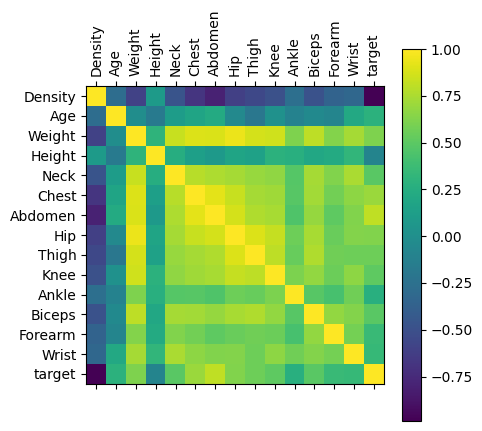

In [46]:
# YOUR CODE HERE
plt.matshow(df_bf.corr())
plt.xticks(range(len(df_bf.columns)), df_bf.columns, rotation=90)
plt.yticks(range(len(df_bf.columns)), df_bf.columns)
plt.colorbar()
plt.show()

based off the chart the most correlated columns are Abdomen and target. We also saw this in the 

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

Decision Tree Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
https://en.wikipedia.org/wiki/Decision_tree_learning

Nearest Neighbor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Random Forest Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

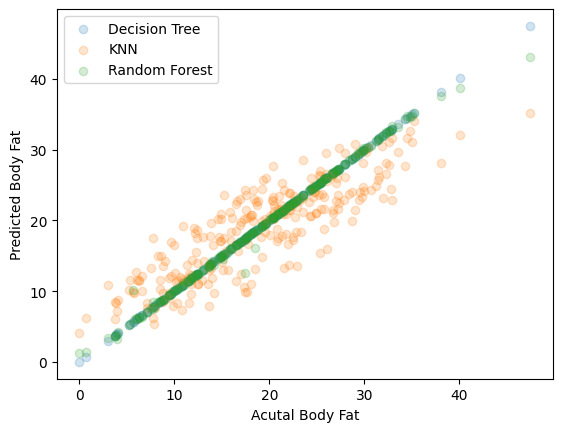

0.0 0.0 3.5410317417175055 18.919979217185883 0.1479960188624404 0.31188140470703785


In [61]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
X = df_bf.drop("target", axis=1)
y = df_bf['target']

model_tree = DecisionTreeRegressor()
model_knn = KNeighborsRegressor(n_neighbors=5)
model_forest = RandomForestRegressor()

model_tree.fit(X,y)
model_knn.fit(X,y)
model_forest.fit(X,y)

pred_tree = model_tree.predict(X)
pred_knn = model_knn.predict(X)
pred_forest = model_forest.predict(X)

plt.scatter(y, pred_tree, label='Decision Tree', alpha=0.2)
plt.scatter(y,pred_knn, label='KNN', alpha=0.2)
plt.scatter(y, pred_forest, label="Random Forest", alpha=0.2)
plt.legend()
plt.xlabel('Acutal Body Fat')
plt.ylabel('Predicted Body Fat')
plt.show()

treeMAE = mean_absolute_error(y, pred_tree)
treeMSE = mean_squared_error(y,pred_tree)
KNNMAE = mean_absolute_error(y, pred_knn)
KNNMSE = mean_squared_error(y, pred_knn)
forestMAE = mean_absolute_error(y, pred_forest)
forestMSE = mean_squared_error(y, pred_forest)
print(treeMAE,treeMSE,KNNMAE,KNNMSE,forestMAE,forestMSE)

based on the chart you see that the Decision tree had the best performance with the lowest L1 and L2 losses. That being said this is a clear sign of overfitting. The model is memorizing the training data instead of learning the underlying patterns. This is evident from the fact that the predicted values match the actual values almost perfectly, which is not typical for a well-generalized model. In real-world scenarios, we would expect some level of error due to noise and variability in the data. The other two models, KNN and Random Forest, show more realistic performance with higher L1 and L2 losses, indicating they are not overfitting to the training data as severely as the Decision Tree model. TLDR: Decision tree is overfitting, KNN and Random Forest are more realistic. FOREST #1

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

Decision Tree CV L2 loss: 3.9527055045757877
KNN CV L2 Loss:36.2340293348675
Random Forest CV L2 Loss: 2.4978066333679734
depth: 11
Leaves: 183


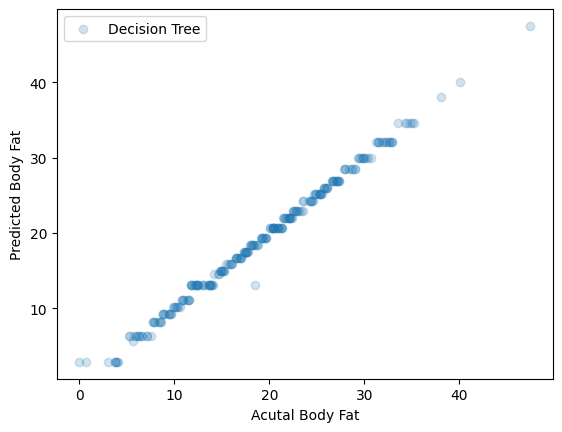

0.3788141793593599 0.3620762130961594
New Tree (depth 5) CV L2 Loss: 4.149090448496468


In [68]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(model_tree, X, y, cv=5, scoring='neg_mean_squared_error')
cv_loss_tree = -1 * scores_tree.mean()

scores_knn = cross_val_score(model_knn, X, y, cv=5, scoring='neg_mean_squared_error')
cv_loss_knn = -1 * scores_knn.mean()

scores_forest = cross_val_score(model_forest, X, y, cv=5, scoring='neg_mean_squared_error')
cv_loss_forest = -1 * scores_forest.mean()

print(f'Decision Tree CV L2 loss: {cv_loss_tree}')
print(f'KNN CV L2 Loss:{cv_loss_knn}')
print(f'Random Forest CV L2 Loss: {cv_loss_forest}')
print("depth:", model_tree.get_depth())
print('Leaves:', model_tree.get_n_leaves())

model_tree2 = DecisionTreeRegressor(max_depth=5)
model_tree2.fit(X,y)
pred_tree2 = model_tree2.predict(X)
plt.scatter(y, pred_tree2, label='Decision Tree', alpha=0.2)
plt.legend()
plt.xlabel('Acutal Body Fat')
plt.ylabel('Predicted Body Fat')
plt.show()

treeMAE2 = mean_absolute_error(y, pred_tree2)
treeMSE2 = mean_squared_error(y,pred_tree2)

scores_tree2 = cross_val_score(model_tree2, X, y, cv=5, scoring='neg_mean_squared_error')
cv_loss_tree2 = -1 * scores_tree2.mean()
print(treeMAE2,treeMSE2)
print(f'New Tree (depth 5) CV L2 Loss: {cv_loss_tree2}')

Decision tree: traing loss: 0.0 perfect score (suspicuous)
CV Loss: -3.6 (much higher showing signs of overfitting)
Diagnosis: The model was overfitting the training data. It performed perfectly on the training data but poorly on the cross-validation data, indicating that it did not generalize well to unseen data. The Random Forest had the best score of -2.49.

The decision tree showed signs of overfitting, with a perfect 0.0 training loss but a high 3.6 validation loss. The Random Forest performed the best overall( 2.49 CV loss). While it still showed some overfitting (0.31 vs 2.49), the ensemble method allowed it to generalize better than the single tree.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [76]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor())
])

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])
pipe_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestRegressor())
])

pipe_tree.fit(X,y)
pred_tree3 = pipe_tree.predict(X)
treeMAE3 = mean_absolute_error(y,pred_tree3)
treeMSE3 = mean_squared_error(y,pred_tree3)
pipe_knn.fit(X,y)
pred_knn3 = pipe_knn.predict(X)
knnMAE3 = mean_absolute_error(y, pred_knn3)
knnMSE3 = mean_squared_error(y, pred_knn3)
pipe_forest.fit(X,y)
pred_forest3 = pipe_forest.predict(X)
forestMAE3 = mean_absolute_error(y, pred_forest3)
forestMSE3 = mean_squared_error(y, pred_forest3)

print(f'Scaled Tree MSE: {treeMSE3}')
print(f'Scaled KNN MSE: {knnMSE3}')
print(f'Scaled Forest MSE: {forestMSE3}')


Scaled Tree MSE: 0.0
Scaled KNN MSE: 6.310403120648124
Scaled Forest MSE: 0.2900319558575337


KNN was the most improved by standardization. I learned that KNN is sensitive to the scale of the features because it relies on distance calculations. If the data is not scaled the model sees a difference for 50 for weight and only 0.1 for height. It sees a difference of 500 times more.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

# answer
I would tell them that picking the best one out of 1000 models will likely be selecting the fluke rather than a good model. If we give it new data it will most likely no do well. 

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [12]:
# YOUR CODE HERE

# Answer
Best Model: Random Forest Regressor with standardization.
why? I chose this model based on consistecy and generalization. It provided the best balance between learning the data and performing well on unseen data (cross validation), avoiding the extremes of overfitting or underfitting. When compared to Decision tree and KNN the single decision tree showed severe overfitting. It had a 0.0 perfect memorization but a much higher cross validation (3.9527055045757877). The KNN just never got the numbers we wanted. even with standardization it was still off.
Conclusion: Given that body fat prediction relies on complex interaction between different measurements, the Random Forest's 'ensemble' approach allowed it to capture these patterns better than the distance based KNN or the erractice single decision tree.